In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import sympy as sym
from scipy import constants as const

## Wczytanie danych

In [3]:
data1 = pd.read_csv("tab1.txt", delimiter = "\t")
data2 = pd.read_csv("tab2.txt", delimiter = " ")
data3 = pd.read_csv("tab3.txt", delimiter = " ")

I_t = 11.4 #mikroA 

data1.head()

,Lambda,I
0,0,11.4
1,373,11.5
2,376,11.6
3,379,11.7
4,382,11.6


## Niepewności

In [4]:
def calc_Dp_multimetr_I(rdg, dgt):
    return 1.4/100 * rdg + 3 * dgt

def calc_Dp_multimetr_U(rdg, dgt):
    if (dgt == 0.0001):
        return 0.28/100 * rdg + 2 * dgt
    else:
        return 0.38/100 * rdg + 2 * dgt

def calc_res_U(Zakres_U):
    res_U = {1.1:0.0001, 11.:0.001, 110.:0.01}
    return res_U[Zakres_U]

def calc_uA(series, mean):
    s = 0
    for x in series:
        s += (x - mean)**2
    s /= len(series)*(len(series)-1)
    return np.sqrt(s)

def calc_uB(Deltas):
    s = 0
    for D in Deltas:
        s += D**2 / 3
    return np.sqrt(s)

#Zakres_I = 400
res_I = 0.1
u_I_t = calc_uB([calc_Dp_multimetr_I(I_t, res_I)])
u_Lambda = 2/np.sqrt(3)

data2['uU'] = data2.apply(lambda row: calc_uB([ calc_Dp_multimetr_U(row['U'],calc_res_U(row['Zakres_U'])) ]), axis=1)
data3['uU'] = data3.apply(lambda row: calc_uB([ calc_Dp_multimetr_U(row['U'],calc_res_U(row['Zakres_U'])) ]), axis=1)

data1['uI'] = data1.apply(lambda row: calc_uB([ calc_Dp_multimetr_I(row['I'], res_I) ]), axis=1)
data2['uI'] = data2.apply(lambda row: calc_uB([ calc_Dp_multimetr_I(row['I'], res_I) ]), axis=1)
data3['uI'] = data3.apply(lambda row: calc_uB([ calc_Dp_multimetr_I(row['I'], res_I) ]), axis=1)

data1.loc[30:40]

,Lambda,I,uI
30,460,14.5,0.290407
31,463,14.7,0.292024
32,466,14.9,0.293640
33,469,15.0,0.294449
34,472,15.2,0.296065
35,475,15.3,0.296874
36,478,15.5,0.298490
37,481,15.6,0.299298
38,484,15.8,0.300915
39,487,15.9,0.301723


## Tabela 1

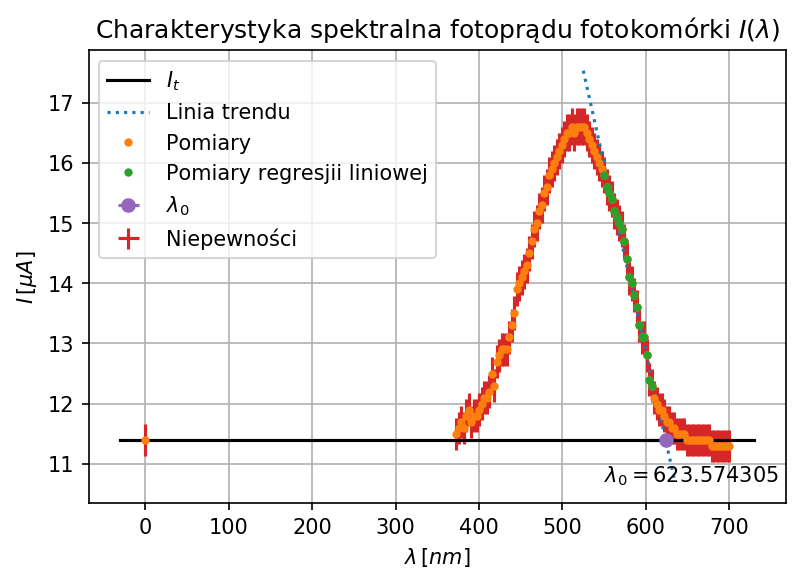

In [5]:
plt.rcParams['figure.dpi'] = 150
x = data1['Lambda']
y = data1['I']
xerr = u_Lambda * np.ones(len(x))
yerr = data1['uI']

x0 = np.linspace(x[0]-30,x[len(x)-1]+30,1000)
y0 = np.ones(len(x0)) * I_t
plt.plot(x0,y0,"-", color='black', label="$I_t$")

start = 60
end = 80
p, V = np.polyfit(x[start:end], y[start:end], 1, full=False, cov=True)

x0 = np.linspace(x[start]-25, x[end]+25, 100)
plt.plot(x0, p[0]*x0 + p[1],':', label="Linia trendu")

plt.plot(x,y,'.', label='Pomiary')
plt.plot(x[start:end], y[start:end],'.', label='Pomiary regresjii liniowej')

Lambda_0 = (-p[1]+I_t)/p[0]
#Lambda_0 = (-p[1])/p[0]
u_Lambda_0 = np.sqrt((-(-p[1]+I_t)/p[0]**2)**2 * V[0][0]  +  (1/p[0])**2 * V[1][1]  +  (1/p[0])**2 * u_I_t**2)

W = const.h * const.c / (Lambda_0 * 1e-9)
u_W = const.h * const.c * (u_Lambda_0*1e-9) / (Lambda_0*1e-9)**2

plt.errorbar(x=Lambda_0, y=I_t, xerr=u_Lambda_0, fmt="o", color='C4', label="$\lambda_0$")
plt.text(550,10.7,"$\lambda_0 = {:f}$".format(Lambda_0))
#plt.plot(Lambda_0, 0, "D", color='C4', label="$\lambda_0$")

plt.errorbar(x=x, y=y,xerr=xerr, yerr=yerr, fmt="none", label='Niepewności', color='C3')
plt.title("Charakterystyka spektralna fotoprądu fotokomórki $I(\lambda)$")
plt.xlabel("$\lambda\, [nm]$")
plt.ylabel("$I\, [\mu A]$")
plt.grid(axis="both")
plt.legend()
plt.savefig("I_Lambda",dpi=600)
plt.show()

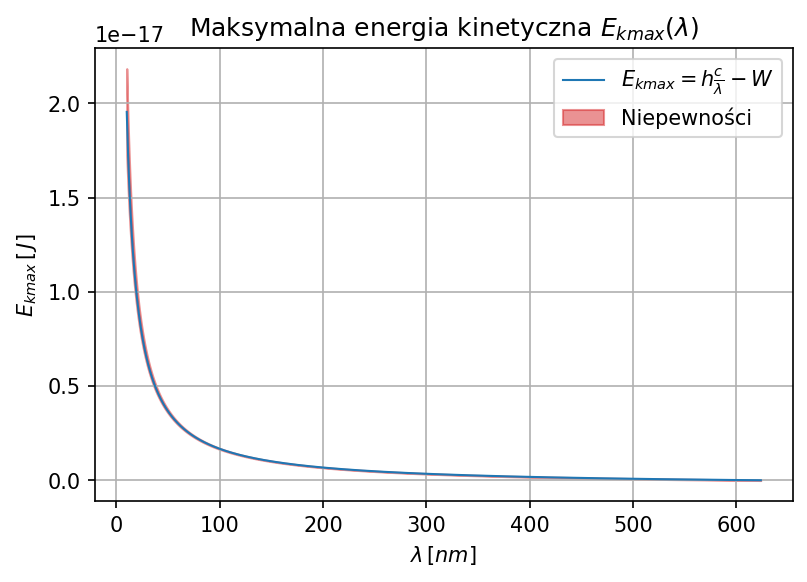

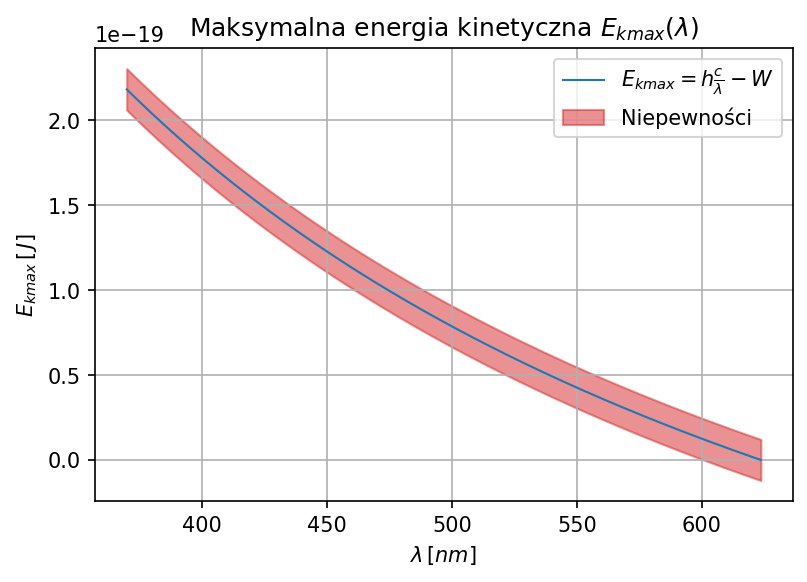

In [10]:
def plotEnergy(start_L):
    plt.rcParams['figure.dpi'] = 150

    x = np.linspace(start_L, Lambda_0,1000)
    y = const.h * const.c / (x*1e-9) - W
    yerr = np.sqrt( (const.h * const.c / (x*1e-9)**2)**2 * (u_Lambda*1e-9)**2  +  1 * u_W**2)

    plt.plot(x,y, label=r"$E_{kmax} = h \frac{c}{\lambda} - W$", linewidth=1)
    #plt.plot(x,yerr)

    plt.fill_between(x, y-yerr, y+yerr, alpha=0.5, color="C3", label="Niepewności")

    plt.grid(b=True, axis="both")
    plt.title("Maksymalna energia kinetyczna $E_{kmax} (\lambda)$")
    plt.legend()
    plt.xlabel("$\lambda \, [nm]$")
    plt.ylabel(r"$E_{kmax} \, [\,J]$")
    plt.savefig("E_kmax_{}".format(start_L), dpi=600)
    plt.show()

plotEnergy(10)
plotEnergy(370)


In [7]:
print(W/const.e, u_W/const.e)

1.988282669510386 0.0753863688787696


## Tabela 2 i 3

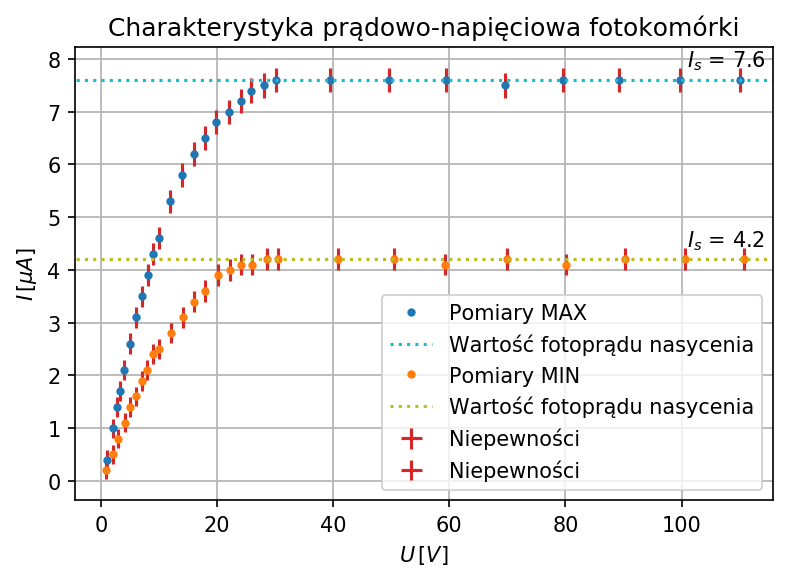

In [8]:
data = data2

x = data['U']
y = data['I']
xerr = data['uU']
yerr = data['uI']

plt.errorbar(x=x, y=y, xerr=xerr, yerr=yerr, fmt='none', label='Niepewności', color='C3')

I_nasycenia = y.iloc[-1]
U_I_nasycenia = x.iloc[-1]
#plt.plot(U_I_nasycenia, I_nasycenia,'o', label="Wartość fotoprądu nasycenia")
#plt.text(U_I_nasycenia-22, I_nasycenia-0.6, "({:.1f}$V$, {:.1f}$\mu A$)".format(x.iloc[-1], y.iloc[-1]))

plt.plot(x,y,'.', label="Pomiary MAX")

plt.xlim(plt.xlim())
x0 = np.linspace(-10,120,130)
y0 = np.ones(len(x0)) * I_nasycenia
plt.plot(x0,y0,':', label="Wartość fotoprądu nasycenia", color="C9")
plt.text(101, I_nasycenia+0.25, "$I_s$ = {:.1f}".format(I_nasycenia))

data = data3

x = data['U']
y = data['I']
xerr = data['uU']
yerr = data['uI']

plt.errorbar(x=x, y=y, xerr=xerr, yerr=yerr, fmt='none', label='Niepewności', color='C3')

I_nasycenia = y.iloc[-1]
U_I_nasycenia = x.iloc[-1]
#plt.plot(U_I_nasycenia, I_nasycenia,'o', label="Wartość fotoprądu nasycenia")
#plt.text(U_I_nasycenia-22, I_nasycenia-0.6, "({:.1f}$V$, {:.1f}$\mu A$)".format(x.iloc[-1], y.iloc[-1]))

plt.plot(x,y,'.', label="Pomiary MIN")

plt.xlim(plt.xlim())
x0 = np.linspace(-10,120,130)
y0 = np.ones(len(x0)) * I_nasycenia
plt.plot(x0,y0,':', label="Wartość fotoprądu nasycenia", color="C8")
plt.text(101, I_nasycenia+0.25, "$I_s$ = {:.1f}".format(I_nasycenia))


plt.legend()
plt.xlabel('$U\, [V]$')
plt.ylabel('$I\, [\mu A]$')
plt.title("Charakterystyka prądowo-napięciowa fotokomórki")
plt.grid(b=True, axis='both')
plt.savefig("char_I_V", dpi=600)
plt.show()